In [40]:
#Imorting liraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
paris_ts = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\04 - Data Cleaning\Paris.csv')

In [42]:
paris_ts.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,conditions,description,date,pm25,pm10,o3,no2,so2,co,City
0,48.8572,2.34141,Paris,2014-01-01,1388530800,10.5,6.7,8.4,85.06,1.82,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,2014-01-01,43.0,30.0,22.0,42.0,NaN,4.0,Paris
1,48.8572,2.34141,Paris,2014-01-02,1388617200,11.1,8.5,9.9,81.63,4.96,...,Rain,Clear conditions throughout the day with rain ...,2014-01-02,53.0,33.0,22.0,34.0,NaN,2.0,Paris
2,48.8572,2.34141,Paris,2014-01-03,1388703600,13.4,8.5,11.0,76.53,0.14,...,"Rain, Partially cloudy",Partly cloudy throughout the day with morning ...,2014-01-03,50.0,28.0,23.0,41.0,NaN,3.0,Paris
3,48.8572,2.34141,Paris,2014-01-04,1388790000,12.4,7.6,9.1,80.53,0.67,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain in ...,2014-01-04,52.0,23.0,19.0,34.0,NaN,3.0,Paris
4,48.8572,2.34141,Paris,2014-01-05,1388876400,8.9,4.6,6.9,82.81,1.25,...,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,2014-01-05,45.0,20.0,20.0,30.0,NaN,3.0,Paris


In [43]:
paris_ts.columns

Index(['latitude', 'longitude', 'address', 'datetime', 'datetimeEpoch',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'description', 'date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
       'City'],
      dtype='object')

In [44]:
# For time series analysis I just need the date column and the columns with pollutions. I can drop all the rest 

paris_ts = paris_ts[['datetime', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]

In [45]:
paris_ts.head()

,datetime,pm25,pm10,o3,no2,so2,co
0,2014-01-01,43.0,30.0,22.0,42.0,NaN,4.0
1,2014-01-02,53.0,33.0,22.0,34.0,NaN,2.0
2,2014-01-03,50.0,28.0,23.0,41.0,NaN,3.0
3,2014-01-04,52.0,23.0,19.0,34.0,NaN,3.0
4,2014-01-05,45.0,20.0,20.0,30.0,NaN,3.0


In [46]:
paris_ts.dtypes

datetime     object
pm25        float64
pm10        float64
o3          float64
no2         float64
so2         float64
co          float64
dtype: object

In [47]:
#I need to convert datetime to datetime object 

paris_ts.datetime= pd.to_datetime(paris_ts.datetime)

In [48]:
paris_ts.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
so2                float64
co                 float64
dtype: object

In [49]:
paris_ts.shape

(2922, 7)

Missing values

In [50]:
paris_ts.isna().sum()


datetime       0
pm25         140
pm10         139
o3           153
no2          139
so2         2593
co          1277
dtype: int64

In [51]:
# I will drop columns with two pollutants so2 and co as they have too much missing values, so they won't be useful for my analysis 
paris_ts.drop(columns=['so2','co'], inplace=True)

In [52]:
# I'm looking for the columns with the missing values
nan = paris_ts[paris_ts['pm25'].isna()]
nan.head()

,datetime,pm25,pm10,o3,no2
362,2014-12-29,NaN,NaN,NaN,NaN
363,2014-12-30,NaN,NaN,NaN,NaN
364,2014-12-31,NaN,71.0,17.0,52.0
729,2015-12-31,NaN,NaN,NaN,NaN
730,2016-01-01,NaN,24.0,18.0,34.0


In [53]:
#I will fill empty values with the mean for each month, to do that I create a new column year-month thanks to which I will be able to calaculate a mean value for each month of each year
paris_ts['year_month']=paris_ts['datetime'].dt.to_period('M')

In [54]:
#Now I create new df with average values of all pollutants for each month
avg_year_months = paris_ts.groupby('year_month').agg('mean')
avg_year_months

,pm25,pm10,o3,no2
year_month,,,,
2014-01,65.741935,36.161290,14.967742,45.677419
2014-02,57.357143,34.142857,20.250000,43.750000
2014-03,100.741935,57.677419,22.967742,57.064516
2014-04,73.066667,52.933333,27.766667,51.000000
2014-05,60.741935,40.419355,30.387097,46.483871
...,...,...,...,...
2021-08,39.645161,25.935484,31.032258,16.322581
2021-09,51.866667,28.833333,32.866667,30.100000
2021-10,52.225806,29.935484,20.366667,28.451613


In [55]:
#I need a polutant list as I will iterate through them
pollutants = avg_year_months.columns.tolist()
pollutants

['pm25', 'pm10', 'o3', 'no2']

In [56]:
# I am filling a missing values in data with average values of each pollutant in the same month and in the same year 
for i in range(len(pollutants)):
	for year_month in paris_ts.year_month.unique():
		mean = avg_year_months.loc[year_month][i]
		paris_ts.loc[paris_ts.year_month==year_month, pollutants[i]] = paris_ts.loc[paris_ts.year_month==year_month, pollutants[i]].fillna(mean)

In [57]:
# There are still missing values. From the earlier observation I could see that there are 3 months in 2017 (July, August and September) for which there are no measurements
# I decided to fill these values with the mean of each day in 2016 and 2018, for example:
# value for 1st of July 2017 will be filled with the mean of values recorded on 1st of July 2016 and 2018 
paris_ts.isna().sum()

datetime       0
pm25          92
pm10          92
o3            92
no2           92
year_month     0
dtype: int64

In [58]:
# I create additional columns to help me fill missing values
paris_ts['year']=paris_ts['datetime'].dt.year
paris_ts['month_day'] = paris_ts['datetime'].dt.strftime('%m-%d')

In [59]:
# I am taking values only for 2 years 2016 and 2018
paris16_18 = paris_ts.loc[(paris_ts['year']==2016) |(paris_ts['year']==2018)]

In [60]:
# I am creating a means for each month and day from values recorded in 2016 and 2018
averge_for_days = paris16_18.groupby('month_day').agg('mean')
averge_for_days

,pm25,pm10,o3,no2,year
month_day,,,,,
01-01,49.100000,24.5,21.000000,30.50,2017.0
01-02,49.000000,22.0,24.000000,26.00,2017.0
01-03,42.500000,24.0,21.000000,34.50,2017.0
01-04,42.000000,25.0,22.000000,39.00,2017.0
01-05,48.500000,29.0,17.000000,40.50,2017.0
...,...,...,...,...,...
12-27,97.500000,49.5,5.500000,42.00,2017.0
12-28,95.000000,53.5,4.500000,40.00,2017.0
12-29,106.000000,47.0,7.500000,41.50,2017.0


In [61]:
# Now I can fill missing values thanks to the df above and the pollutant list
for i in range(len(pollutants)):
	for month_day in paris_ts.month_day.unique():
		mean = averge_for_days.loc[month_day][i]
		paris_ts.loc[(paris_ts.month_day==month_day) & (paris_ts.year==2017), pollutants[i]] = paris_ts.loc[(paris_ts.month_day==month_day) & (paris_ts.year==2017), pollutants[i]].fillna(mean)

In [62]:
# It looks like I was able to fill all of the missing values
paris_ts.isna().sum()

datetime      0
pm25          0
pm10          0
o3            0
no2           0
year_month    0
year          0
month_day     0
dtype: int64

In [63]:
#I'm checking if the values were filled correctly --> They were :)
paris_ts[paris_ts.month_day=='07-01']

,datetime,pm25,pm10,o3,no2,year_month,year,month_day
181,2014-07-01,62.0,40.0,42.0,59.0,2014-07,2014,07-01
546,2015-07-01,81.0,56.0,44.0,57.0,2015-07,2015,07-01
912,2016-07-01,35.0,24.0,22.0,27.0,2016-07,2016,07-01
1277,2017-07-01,51.5,37.5,39.0,43.5,2017-07,2017,07-01
1642,2018-07-01,68.0,51.0,56.0,60.0,2018-07,2018,07-01
2007,2019-07-01,44.0,39.0,38.0,35.0,2019-07,2019,07-01
2373,2020-07-01,36.0,17.0,23.0,23.0,2020-07,2020,07-01
2738,2021-07-01,53.0,37.0,37.0,38.0,2021-07,2021,07-01


In [65]:
# I am dropping the columns which I won't need anymore and which were used only to fill missing values
paris_ts.drop(columns=['year_month', 'year', 'month_day'], inplace=True)

Outliers

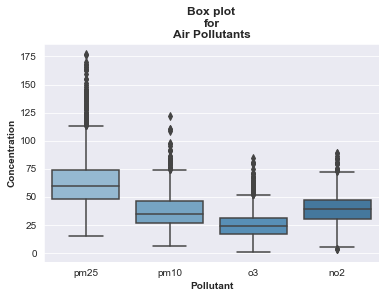

In [69]:
# I am checking for the outliers by plooting box plot
sns.set_palette("Blues_d")
sns.set_style('darkgrid')
sns.boxplot(data=paris_ts)
plt.title('Box plot\nfor\nAir Pollutants', fontweight='bold')
plt.ylabel('Concentration', fontweight='bold')
plt.xlabel('Pollutant', fontweight='bold')
plt.show()

In [67]:
paris_ts.describe()

,pm25,pm10,o3,no2
count,2922.000000,2922.000000,2922.000000,2922.000000
mean,63.779860,37.313246,24.908479,38.463754
std,22.347357,14.415868,11.732745,13.013070
min,15.000000,6.000000,1.000000,4.000000
25%,48.000000,27.000000,17.000000,30.000000
50%,60.000000,35.000000,24.000000,39.000000
75%,74.000000,46.000000,31.000000,47.000000
max,177.000000,122.000000,85.000000,89.000000


Saving file for further analysis 

In [68]:
paris_ts.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Paris_clean_for_ts.csv', index_label=False)